In [210]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [211]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights", "./yolov3-tiny.cfg")

In [212]:
classes = []

with open("./coco.names", 'r') as f:
    classes = f.read().splitlines()

In [213]:
len(classes)

80

In [214]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [215]:
img = cv2.imread("./traffik/Low-Traffic-Neighbourhood_.jpg")

In [216]:
blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), (0, 0, 0), swapRB=True, crop=False)

In [217]:
blob.shape

(1, 3, 320, 320)

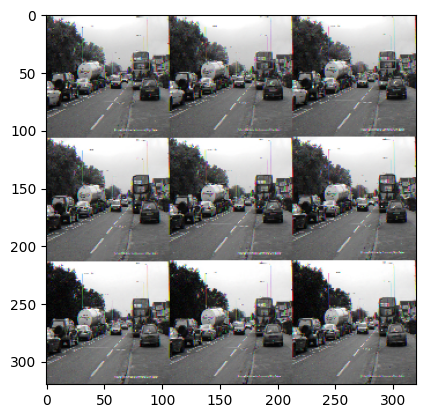

In [218]:
i = blob[0].reshape(320, 320, 3)
plt.imshow(i)

In [219]:
yolo.setInput(blob)

In [220]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [221]:
layeroutput

(array([[0.07610688, 0.0630736 , 0.22317715, ..., 0.        , 0.        ,
         0.        ],
        [0.04288705, 0.05894889, 0.26282114, ..., 0.        , 0.        ,
         0.        ],
        [0.04890249, 0.05463905, 1.2026751 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9513258 , 0.9434972 , 0.2670952 , ..., 0.        , 0.        ,
         0.        ],
        [0.95466816, 0.93444395, 0.25410435, ..., 0.        , 0.        ,
         0.        ],
        [0.9578535 , 0.93935615, 0.9238323 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.0321399 , 0.03481268, 0.02764314, ..., 0.        , 0.        ,
         0.        ],
        [0.02902267, 0.03135798, 0.04361134, ..., 0.        , 0.        ,
         0.        ],
        [0.0198978 , 0.02562512, 0.16222483, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9722899 , 0.9747443 , 0.02458203, ..., 0.        , 0.        ,
         0.        

In [222]:
height, width, channels = img.shape

In [223]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)

            x = int(center_x - w/2)
            y = int(center_y - h/2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))

            class_ids.append(class_id)


In [224]:
len(boxes)

3

In [225]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [226]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [227]:
for i in indexes.flatten():
    x, y, w, h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x,y), (x+w, y+h), color, 1)
    cv2.putText(img, label + " " + confi, (x, y + 20), font, 2, (255, 255, 255), 1)

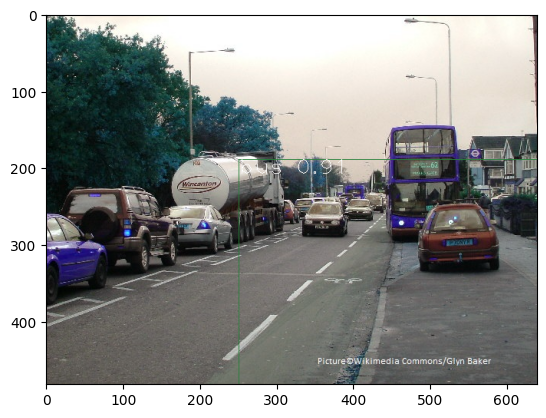

In [228]:
plt.imshow(img)

In [229]:
cv2.imwrite("./modified.jpg", img)

True